# Filtering

In [1]:
## Noise filetrin gwith

In [2]:
import cv2
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats
import scipy.signal
from pprint import pprint

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20, 5)

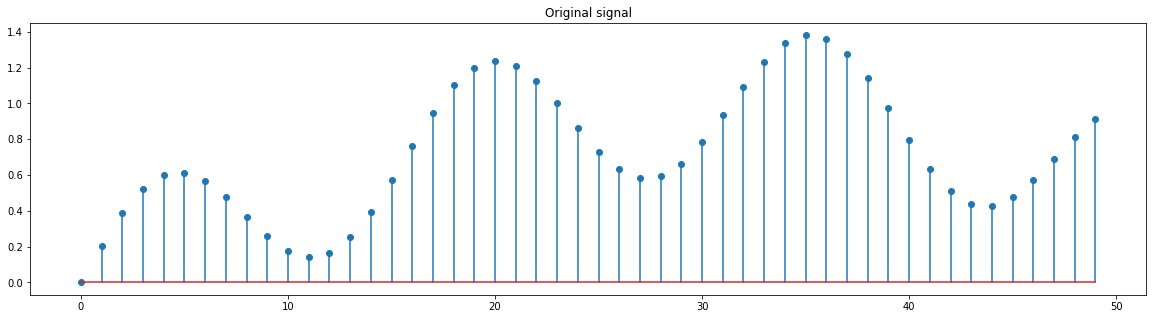

In [3]:
x = np.arange(50)
signal = np.sin(0.05*x) + 0.4*np.sin(0.4*x)
plt.stem(x, signal);
plt.title('Original signal');

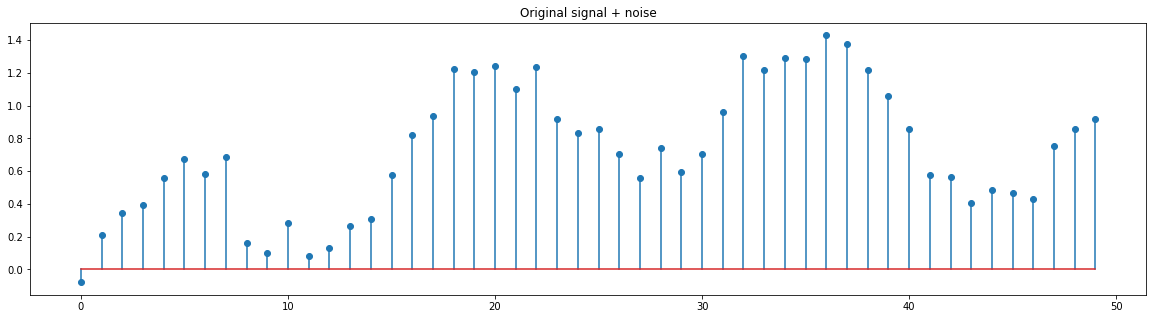

In [4]:
noise = 0.1*np.random.randn(len(x))
noisy_signal = signal + noise
plt.stem(x, noisy_signal);
plt.title('Original signal + noise');

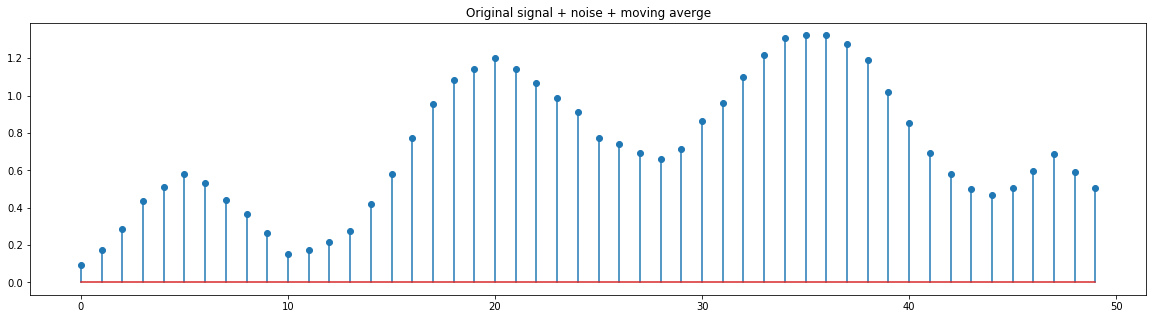

In [5]:
# moving average 
avg_mask = np.ones(5) / 5
filtered_noisy_signal = np.convolve(noisy_signal, avg_mask, 'same')
plt.stem(x, filtered_noisy_signal);
plt.title('Original signal + noise + moving averge');

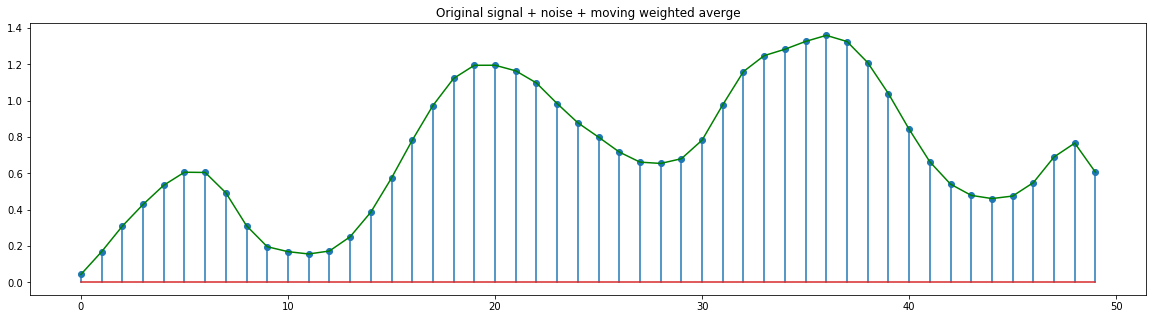

In [6]:
# moving weighted average
avg_mask = np.array([1, 4, 6, 4, 1]) / 16
filtered_noisy_signal = np.convolve(noisy_signal, avg_mask, 'same')
plt.stem(x, filtered_noisy_signal);
# equivalent to:
ns = np.array([0,0] + list(noisy_signal) + [0,0])
fns = []
for i in range(len(noisy_signal)):
    fns.append(np.dot(avg_mask, ns[i:i+5]))
plt.plot(x, fns,'g');
plt.title('Original signal + noise + moving weighted averge');

## 2D filtering (conv)

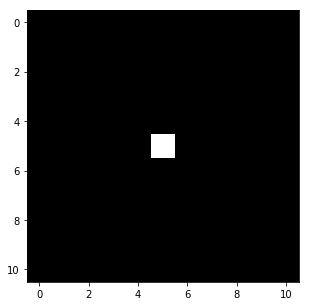

In [7]:
dot = np.zeros((11,11))
dot[5,5] = 255
plt.imshow(dot, cmap='gray', vmin=0, vmax=255)

[[ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]]


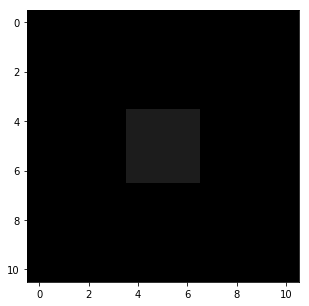

In [8]:
ker_a = np.ones((3,3))/3**2
print(ker_a)
plt.imshow(scipy.signal.convolve2d(dot, ker_a, 'same'), cmap='gray', vmin=0, vmax=255)

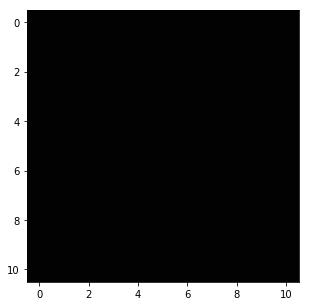

In [9]:
ker_b = np.ones((11,11))/11**2
plt.imshow(scipy.signal.convolve2d(dot, ker_b, 'same'), cmap='gray', vmin=0, vmax=255)

array([[ 0.00264129,  0.00607754,  0.01002016,  0.01183742,  0.01002016,
         0.00607754,  0.00264129],
       [ 0.00607754,  0.01398426,  0.02305615,  0.02723762,  0.02305615,
         0.01398426,  0.00607754],
       [ 0.01002016,  0.02305615,  0.03801317,  0.04490725,  0.03801317,
         0.02305615,  0.01002016],
       [ 0.01183742,  0.02723762,  0.04490725,  0.05305165,  0.04490725,
         0.02723762,  0.01183742],
       [ 0.01002016,  0.02305615,  0.03801317,  0.04490725,  0.03801317,
         0.02305615,  0.01002016],
       [ 0.00607754,  0.01398426,  0.02305615,  0.02723762,  0.02305615,
         0.01398426,  0.00607754],
       [ 0.00264129,  0.00607754,  0.01002016,  0.01183742,  0.01002016,
         0.00607754,  0.00264129]])
0.920766483808


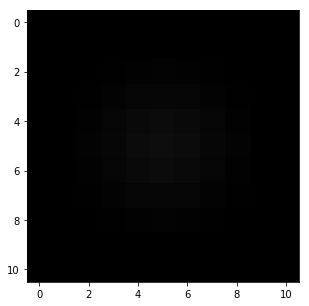

In [ ]:
from scipy.stats import multivariate_normal
x, y = np.mgrid[-3:4:1, -3:4:1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal(np.zeros(2), 3*np.eye(2))
ker_c = rv.pdf(pos)
pprint(ker_c)
print(np.sum(ker_c))
plt.imshow(scipy.signal.convolve2d(dot, ker_c, 'same'), cmap='gray', vmin=0, vmax=255);

In [ ]:
imgbgr = cv2.imread('lena.png')
img = imgbgr[:,:,::-1]
imgbw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(imgbw, cmap='gray', vmin=0, vmax=255)

## Three equivalent ways to gaussian blur

In [ ]:
dst1 = scipy.signal.convolve2d(imgbw, ker_c, 'same')
dst2 = cv2.filter2D(imgbw, ddepth=-1, kernel=ker_c)
dst3 = cv2.GaussianBlur(imgbw, (7,7), 3)
plt.imshow(np.hstack([dst1, dst2, dst3]), cmap='gray', vmin=0, vmax=255);

## Three different stddev (smoothing levels) of gaussian blur

In [ ]:
dst1 = cv2.GaussianBlur(imgbw, (7,7), 1)
dst2 = cv2.GaussianBlur(imgbw, (7,7), 3)
dst3 = cv2.GaussianBlur(imgbw, (7,7), 10)
plt.imshow(np.hstack([dst1, dst2, dst3]), cmap='gray', vmin=0, vmax=255);

## Removing noise with gaussian blurring

In [ ]:
gauss = np.random.normal(0, 10, imgbw.shape)
gauss = gauss.astype(np.int8)
noisy = cv2.add(imgbw, gauss, dtype=cv2.CV_8U)
blurred_noisy = cv2.GaussianBlur(noisy, (7,7), 1)
plt.imshow(np.hstack((imgbw, noisy, blurred_noisy)), cmap='gray', vmin=0, vmax=255)